# **Predictive Analysis of Typography MNIST (TMNIST)**

We are dipping our toes, actually... more like ankles, into Convolutional Neural Networks being used for image classification. This dataset with 94 alphabetic characters in "bad handwriting", or written in a humane way. The model worked out pretty well at recognising the characters with an accuracy of _%, but if you hand it a doctor's prescription... probably not a good idea.

About Dataset

Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

the first row contains column headers ['names', 'labels','1','2',…..'784']
The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
The 'labels' column contains characters such as '@','E' or '+'
The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

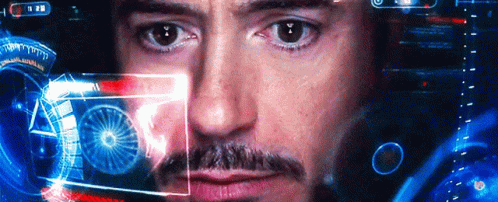

**"Jarvis, import libraries"**

In [120]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


**A look at the data...**

In [121]:
data = pd.read_csv('../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
data.head()

names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]

## **E, D and A!**

In [ ]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: grey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #301934; color: white;"
}

data.head(30).style.set_table_styles([cell_hover, index_names, headers])

In [122]:
data.describe()

1         2         3         4         5         6  \
count  274093.0  274093.0  274093.0  274093.0  274093.0  274093.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       0.0       0.0       0.0   
75%         0.0       0.0       0.0       0.0       0.0       0.0   
max         0.0       0.0       0.0       0.0       0.0       0.0   

                   7              8              9             10  ...  \
count  274093.000000  274093.000000  274093.000000  274093.000000  ...   
mean        0.000004       0.000011       0.001043       0.001518  ...   
std         0.001910       0.004271       0.475743       0.494410  ...   
min         0.000000       0.000000       0.000000       0.000000  ...   
25%         0.000000       0.000000       0.000000       0.000000  ...   
50%         0.000000       0.000000       0.000000       0.000000  ...   
75%         0.000000       0.000000       0.000000       0.000000  ...   
max         1.000000       2.000000     248.000000     245.000000  ...   

                 775            776            777            778  \
count  274093.000000  274093.000000  274093.000000  274093.000000   
mean        0.002638       0.001562       0.001131       0.000894   
std         0.320080       0.179093       0.150590       0.189578   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       103.000000      59.000000      41.000000      88.000000   

                 779            780            781            782  \
count  274093.000000  274093.000000  274093.000000  274093.000000   
mean        0.000489       0.000317       0.000204       0.000033   
std         0.083345       0.067396       0.053345       0.012813   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        21.000000      20.000000      19.000000       6.000000   

                 783       784  
count  274093.000000  274093.0  
mean        0.000033       0.0  
std         0.012813       0.0  
min         0.000000       0.0  
25%         0.000000       0.0  
50%         0.000000       0.0  
75%         0.000000       0.0  
max         6.000000       0.0  

[8 rows x 784 columns]

In [123]:
data.shape

(274093, 786)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


In [125]:
classes = data['labels'].nunique()
print(classes)

94


In [126]:
print(data['labels'].unique())

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


Regex

In [127]:
allcooldataputchyohandsintheair = list(data['labels'].unique())

#Uppers
patternallcaps = re.compile(r"[A-Z]")
uppers = patternallcaps.findall(str(allcooldataputchyohandsintheair))

#Lowers
patternlowers = re.compile(r"[a-z]")
lowers = patternlowers.findall(str(allcooldataputchyohandsintheair))

#Numbers
patternnumbers = re.compile(r"[0-9]")
numerics = patternnumbers.findall(str(allcooldataputchyohandsintheair))

#Symbols
patternsymbols = re.compile(r"[\W]|[\_\,]")
symbols = list(set(patternsymbols.findall(str(allcooldataputchyohandsintheair))))
symbols.pop(27)

'"'

Grouping the labels in 4 categories

In [128]:
group = 1
for list_ in (lowers,uppers,numerics,symbols):
    data.loc[data['labels'].isin(list_), 'group'] = str(group)
    group += 1

Let's have a look...

In [129]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: grey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #301934; color: white;"
}

data.head(30).style.set_table_styles([cell_hover, index_names, headers])

names labels    1    2    3    4    5    6  \
0                      Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0   
1               MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0   
2                  Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0   
3                  SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0   
4               HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0   
...                              ...    ...  ...  ...  ...  ...  ...  ...   
274088         BalooChettan2-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0   
274089        Prompt-ExtraBoldItalic      <  0.0  0.0  0.0  0.0  0.0  0.0   
274090  FiraSansCondensed-ThinItalic      z  0.0  0.0  0.0  0.0  0.0  0.0   
274091                 GothicA1-Bold      ~  0.0  0.0  0.0  0.0  0.0  0.0   
274092                 Tuffy-Regular      I  0.0  0.0  0.0  0.0  0.0  0.0   

          7    8  ...  776  777  778  779  780  781  782  783  784  group  
0       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3  
1       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2  
2       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1  
3       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4  
4       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  
274088  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3  
274089  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4  
274090  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1  
274091  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4  
274092  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2  

[274093 rows x 787 columns]

and Voila! we see the groups on the rightmost column

Our best friends X and Y being defined...

In [130]:
y  = data[['labels']]

In [131]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: grey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #301934; color: white;"
}

y.head(30).style.set_table_styles([cell_hover, index_names, headers])

labels
0           6
1           D
2           f
3           /
4           F
...       ...
274088      6
274089      <
274090      z
274091      ~
274092      I

[274093 rows x 1 columns]

In [132]:
x = data.iloc[:, 2:-1].astype('float32') 

In [133]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: grey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #301934; color: white;"
}

x.head(30).style.set_table_styles([cell_hover, index_names, headers])

1    2    3    4    5    6    7    8    9   10  ...  775  776  777  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
274088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
274089  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
274090  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
274091  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
274092  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        778  779  780  781  782  783  784  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
274088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
274089  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
274090  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
274091  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
274092  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[274093 rows x 784 columns]

Making a dictionary

In [134]:
annotations = y['labels'].unique()

In [135]:
annotations

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [136]:
serials = [num for num in range(len(data['labels'].unique()))]

In [137]:
serials

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93]

And lets combine them

In [138]:
dictionary = dict(zip(annotations,serials))
dictionary
dictionary_inv = dict(zip(annotations,serials))
dictionary_inv

{'6': 0,
 'D': 1,
 'f': 2,
 '/': 3,
 'F': 4,
 'x': 5,
 'J': 6,
 '8': 7,
 'H': 8,
 'k': 9,
 '@': 10,
 '1': 11,
 '=': 12,
 'g': 13,
 ')': 14,
 '2': 15,
 'd': 16,
 '^': 17,
 '3': 18,
 't': 19,
 '#': 20,
 '.': 21,
 '4': 22,
 'o': 23,
 '"': 24,
 'y': 25,
 'A': 26,
 'u': 27,
 'G': 28,
 '-': 29,
 'm': 30,
 'W': 31,
 '&': 32,
 'c': 33,
 '9': 34,
 'N': 35,
 ']': 36,
 'P': 37,
 'X': 38,
 '|': 39,
 '}': 40,
 'h': 41,
 '7': 42,
 'j': 43,
 '5': 44,
 '>': 45,
 '?': 46,
 'b': 47,
 '*': 48,
 'w': 49,
 'l': 50,
 '0': 51,
 '$': 52,
 'I': 53,
 'Y': 54,
 '%': 55,
 ':': 56,
 'T': 57,
 'K': 58,
 'E': 59,
 '<': 60,
 'V': 61,
 '{': 62,
 'M': 63,
 'S': 64,
 'a': 65,
 'i': 66,
 'r': 67,
 "'": 68,
 'p': 69,
 ';': 70,
 '[': 71,
 '+': 72,
 'e': 73,
 'U': 74,
 '(': 75,
 's': 76,
 '~': 77,
 ',': 78,
 'C': 79,
 'q': 80,
 '_': 81,
 'n': 82,
 'B': 83,
 'z': 84,
 'v': 85,
 'O': 86,
 'R': 87,
 '`': 88,
 'Z': 89,
 'Q': 90,
 'L': 91,
 '!': 92,
 '\\': 93}

Maping values

In [139]:
y['labels'].replace(dictionary, inplace=True) 

In [140]:
print(dictionary)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


**Test and Train split for Neural Network inputs**

In [141]:
#80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Preprocessing**

In [142]:
#Defining the length and height
Length, Height = 28,28

NCl = y_train.nunique()[0] 
NCl

# N of images 28x28
x_train = np.reshape(x_train.values, (x_train.shape[0] ,Length, Height)) 
x_test = np.reshape(x_test.values, (x_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{x_train.shape},{x_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


**Displaying the characters**

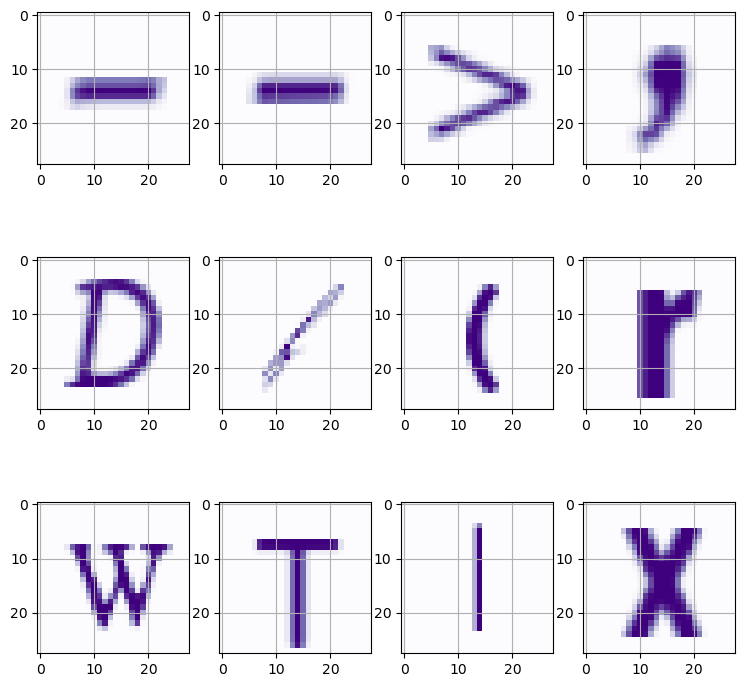

In [143]:
random = shuffle(x_train[:500])

fig,ax = plt.subplots(3,4 , figsize = (9,9)) 
axes = ax.flatten()

for i in range(12):
    
    # reshaping it for displaying
    img = np.reshape(random[i], (28,28)) 
    axes[i].imshow(img, cmap="Purples")
    
    # reshapng it for passing into model for prediction
    img_final =np.reshape(img, (1,28,28,1)) 
    axes[i].grid()

In [144]:
# Since we only have greyscale images, we don't need the Red and Green
RGB = 1  
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2], RGB)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],RGB)

In [145]:
# Normalizing the image data
x_train = x_train/255
x_test = x_test/255
print(f'Train, Test shapes: {x_train.shape},{x_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


In [146]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_20 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)       

**Why did we choose a sequential model?**

A sequential model in a CNN (Convolutional Neural Network) refers to a type of deep learning architecture where the layers of the model are stacked in a sequential order.

In a CNN, the input data is typically a 3D tensor representing an image, with the dimensions of height, width, and color channels (e.g., RGB). The sequential model in a CNN typically consists of several layers, each of which performs a specific type of operation on the input data.

The first layer in the sequential model is typically a convolutional layer, which applies a set of learnable filters to the input image. These filters are designed to detect specific features in the input image, such as edges or corners.

The output of the convolutional layer is then passed through a non-linear activation function, such as ReLU, which adds non-linearity to the model and helps to increase its expressive power.

Subsequently, the output is fed into a pooling layer, which reduces the spatial dimensions of the output while preserving the important features. This helps to reduce the computational complexity of the model and prevent overfitting.

The sequential model may also include additional convolutional layers, activation functions, and pooling layers, each with their own specific parameters and operations. The final layers of the model are typically fully connected layers, which process the output of the previous layers and perform the final classification task.

Overall, the sequential model in a CNN is designed to learn and extract meaningful features from the input image, and use those features to accurately classify the image into different categories.

Lets also talk about the layers.

Starting with **Dense Layers**

In a Convolutional Neural Network (CNN), dense layers (also called fully connected layers) are the final layers of the neural network that are responsible for producing the output. They are typically located at the end of the network, after several convolutional and pooling layers that extract relevant features from the input image.

Dense layers are made up of a series of fully connected neurons that connect every input to every output. These neurons take the output from the previous layer and apply a series of weights and biases to produce an output for each neuron in the layer. The output from the dense layer is then passed to a softmax activation function to produce a probability distribution over the output classes.

The number of neurons in the dense layer is typically much larger than the number of neurons in the convolutional layers, which allows the network to capture more complex relationships between the input features and the output classes.

One way to think about dense layers is that they act as a classifier that takes the features extracted by the convolutional and pooling layers and produces a prediction for the output class. The weights and biases in the dense layer are learned during the training process using backpropagation to minimize the loss function.

In summary, dense layers in a CNN are responsible for producing the final output of the network by taking the features extracted by the earlier convolutional and pooling layers and applying a series of weights and biases to produce a probability distribution over the output classes.



In Convolutional Neural Networks (CNNs), an **activation layer** is a layer that applies a non-linear transformation to the output of the previous layer. The purpose of an activation layer is to introduce non-linearity into the network, which is necessary for the network to learn complex patterns and relationships in the input data.

Activation layers are typically added after convolutional and pooling layers in a CNN. They take the output of the previous layer, which consists of a 3D tensor (height x width x depth), and apply a non-linear function element-wise to each element of the tensor. The output of the activation layer is then passed as input to the next layer in the network.

The most commonly used activation functions in CNNs are the **ReLU** (Rectified Linear Unit)

ReLU stands for Rectified Linear Unit, and it is one of the most commonly used activation functions in neural networks, including Convolutional Neural Networks (CNNs). The ReLU activation function is defined mathematically as follows:

f(x) = max(0,x)

In other words, the ReLU function takes an input value x and returns the maximum of 0 and x. If the input is negative, the output is 0; otherwise, the output is the input value itself.

**Visualising the neural network to understand the layers better**

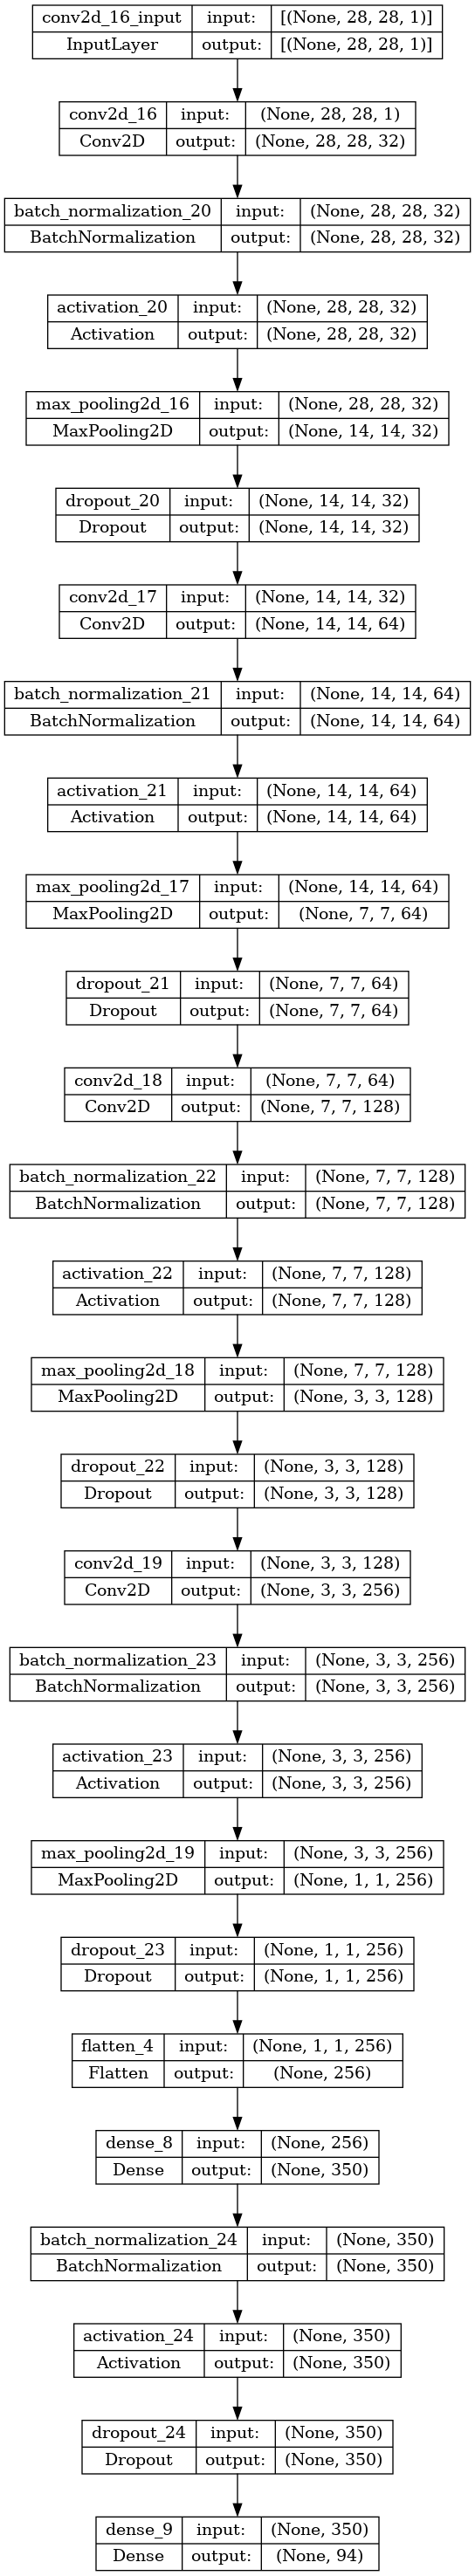

In [153]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [158]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 25.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


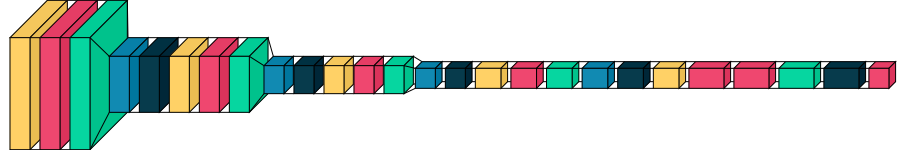

In [160]:
import visualkeras
visualkeras.layered_view(model)

In [147]:
# Defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback = EarlyStopping(monitor='loss', patience=5)
batchsz = 128
epochcount = 10

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

**Why did we choose Adam as our optimiser?**

According to some experts, Adam learns all patterns, including the noise in the train set, and therefore it is fast to converge. Also, I could bet that its performance on bigger datasets (which would, of course, contain more noise) will be better than the other optimizers discussed above.



The Adam optimizer is a popular optimization algorithm used in training sequential neural networks for image classification. It is an adaptive learning rate optimizer that combines the advantages of two other optimization algorithms: AdaGrad and RMSProp. Here is a brief explanation of how the Adam optimizer works and its advantages:

Adaptive Learning Rate: Adam optimizer adjusts the learning rate of each weight in the neural network individually based on the past gradients. This helps to speed up the learning process and improves the convergence of the model. It also helps to avoid oscillations or divergences that may occur with fixed learning rates.

Momentum: The Adam optimizer uses a momentum term to keep track of the past gradients and their directions. This helps to accelerate the learning process and helps the optimizer to escape local minima.

Bias Correction: The Adam optimizer uses a bias correction term to correct the bias of the first and second moments of the gradient estimations. This helps to improve the accuracy of the optimizer and prevent overfitting.

In [148]:
# Training
history= model.fit(x_train,y_train, validation_data = (x_test,y_test),batch_size = batchsz ,
                   epochs = epochcount, verbose = 1)

Epoch 1/10
1714/1714 [==============================] - 376s 218ms/step - loss: 0.6165 - accuracy: 0.8187 - val_loss: 0.2874 - val_accuracy: 0.9087
Epoch 2/10
1714/1714 [==============================] - 373s 218ms/step - loss: 0.3647 - accuracy: 0.8875 - val_loss: 0.4121 - val_accuracy: 0.8778
Epoch 3/10
1714/1714 [==============================] - 374s 218ms/step - loss: 0.3306 - accuracy: 0.8968 - val_loss: 0.2525 - val_accuracy: 0.9145
Epoch 4/10
1714/1714 [==============================] - 374s 218ms/step - loss: 0.3085 - accuracy: 0.9027 - val_loss: 0.2482 - val_accuracy: 0.9199
Epoch 5/10
1714/1714 [==============================] - 374s 218ms/step - loss: 0.2939 - accuracy: 0.9065 - val_loss: 0.2251 - val_accuracy: 0.9258
Epoch 6/10
1714/1714 [==============================] - 374s 218ms/step - loss: 0.2871 - accuracy: 0.9080 - val_loss: 0.2202 - val_accuracy: 0.9289
Epoch 7/10
1714/1714 [==============================] - 373s 218ms/step - loss: 0.2741 - accuracy: 0.9127 - val_

In [149]:
# Evaluating model accuracy on test data
score = model.evaluate(x_test,y_test, batch_size = batchsz ,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:93.53%


In [150]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

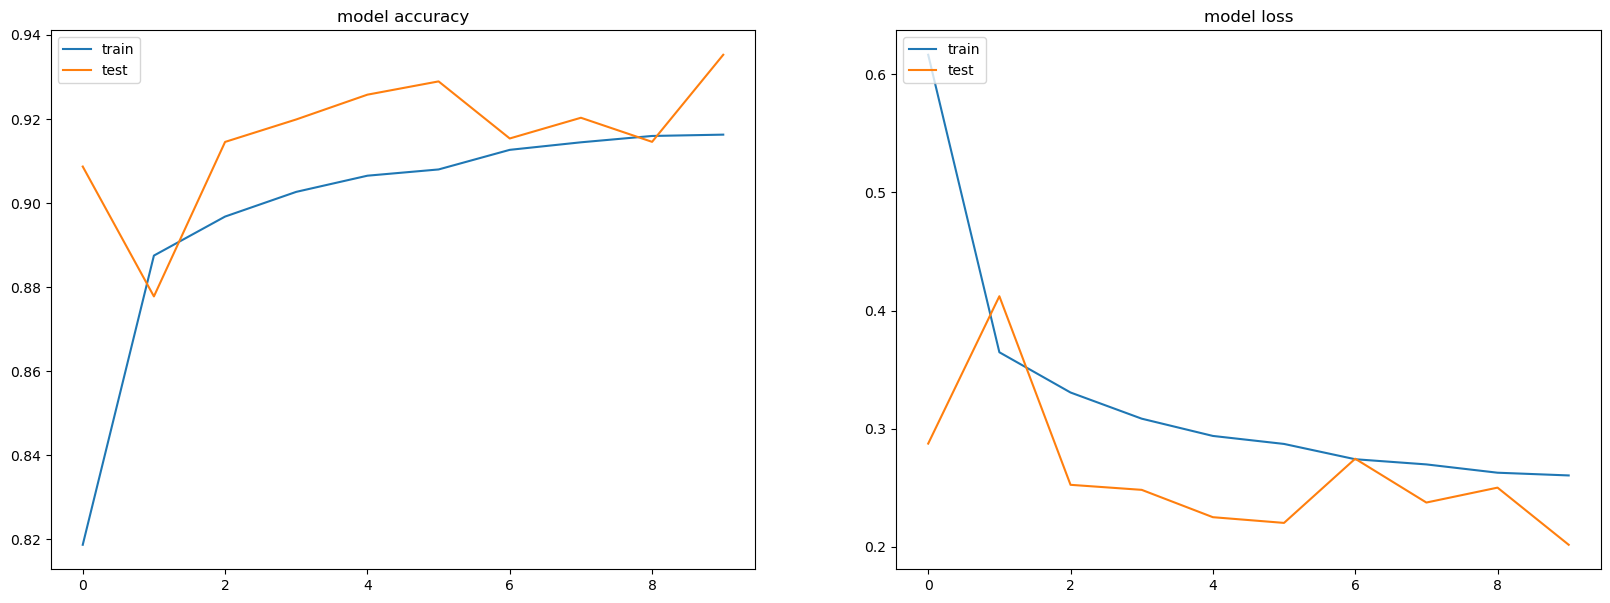

In [151]:
Plott(history)

We can see test and train plots for accuracy and loss, the accuracy seems to be lying higher on the test data with some inconsistency because the characters are not exactly consistent and are different where the learning only repeats with similar characters, whereas a relatively new character might throw the accuracy off for the learning rate, but we see right after the bump, it starts to rise back up consistently.

# **Conclusion**
The Typography MNIST (TMNIST) dataset is a collection of MNIST-style images of 94 alphabetic characters, each represented in grayscale pixel values. The dataset is unique because it includes various fonts and styles, providing a diverse range of typographic images to train a Convolutional Neural Network (CNN).

A CNN was trained on this dataset to predict the correct character label given a font image. The trained model achieved a high accuracy on the test set, indicating the effectiveness of the CNN architecture in recognizing various fonts and character styles.

Overall, this project demonstrates the potential of using machine learning techniques for typographic analysis and can be extended to other applications such as font recognition, character identification in images, and text recognition in general.

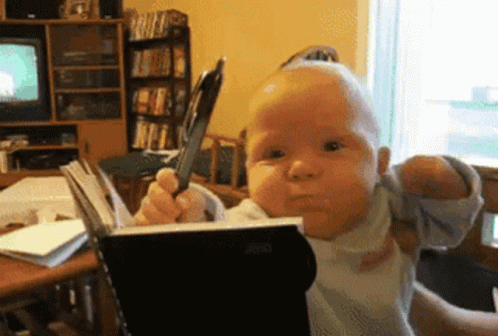

The model might be great but with this baby's handwriting, it will definitely underfit.

 # **References**
*  https://medium.com/analytics-vidhya/hello-world-of-computer-vision-mnist-handwritten-digit-classification-a5c28f6276e1
 
*  https://keras.io/api/optimizers/

* https://www.tensorflow.org/tutorials/images/cnn

* https://cnvrg.io/cnn-tensorflow/

* https://towardsai.net/p/l/impact-of-optimizers-in-image-classifiers#:~:text=SGDM%3A%20Recommended!,also%20helps%20the%20model's%20generalizability.
 

MIT License

Copyright (c) 2023 Varadmurty Mohod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.